In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn.
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/agnie/Python Project/Vehicles.csv')#importowanie danych z pliku .csv
df.head() #sprawdzenie pierwszych pięciu wierszy zbioru danych

,Unnamed: 0,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [3]:
df.info() #sprawdzenie liczebności zbioru, braków danych i typów zmiennych
#co mogę na ten moment powiedzieć o zbiorze:
#kolumna Unnamed do usunięcia,
#braki danych w zmiennych mileage, engine, max_power, seats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8128 non-null   int64  
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 762.1+ KB


In [4]:
df.describe() #sprawdzenie podstawowych statystyk dla zmiennych ilościowych
#pojazd z 14 siedzeniami? wygląda na autobus, bo nie ma informacji jakie to pojazdy, ale może też być to wartość odstająca
#sprawdzić, czy wartości mocno odstające w zmiennych engine, max_power i seats to jeden i ten sam wiersz? bo może znalazły się tu informacje o jednym wyjątkowym pojeździe
#zmienna Year mało informatywna, lepiej byłoby ją przekształcić na wiek
#zmiennej mileage nie ma w opisie danych, może wywalić skoro nie wiadomo jak ja interpretować?

,Unnamed: 0,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,4063.500000,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,2346.495827,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588
min,0.000000,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2031.750000,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4063.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6095.250000,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,8127.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()#nie było żadnych duplikatów, ale lepiej się upewnić

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8128 non-null   int64  
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 825.5+ KB


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True) #usunęłam kolumnę, która była tak naprawdę indeksem
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [8]:
df.describe(include='O')
#każda ze zmiennych jakościowych ma niewiele kategorii, żadna nie ma braków danych

,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,4402,6766,7078,5289


<AxesSubplot:xlabel='selling_price', ylabel='Count'>

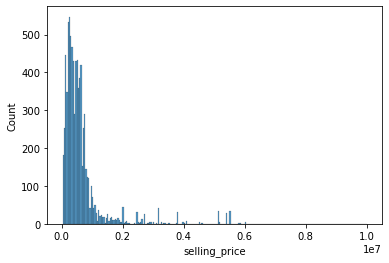

In [9]:
sns.histplot(df['selling_price']) #zmienna objaśniana ma wyraźną asymetrię w rozkładzie
#zastosować przekształcenia logarytmiczne

In [10]:
df.groupby('fuel')['selling_price'].mean().sort_values(ascending=True)
#najdroższe pojazdy są napędzane dieselem

fuel
LPG       200421.052632
CNG       301017.491228
Petrol    462441.061691
Diesel    791452.921627
Name: selling_price, dtype: float64

In [11]:
df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=True)


seller_type
Individual          4.985612e+05
Trustmark Dealer    8.018390e+05
Dealer              1.443494e+06
Name: selling_price, dtype: float64

In [12]:
df.groupby('transmission')['selling_price'].mean().sort_values(ascending=True)
#droższe są pojazdy z automatyczną skrzynią biegów

transmission
Manual       4.554259e+05
Automatic    1.870828e+06
Name: selling_price, dtype: float64

In [13]:
df.groupby('owner')['selling_price'].mean().sort_values(ascending=True)
#najwyższą cenę sprzedaży mają pojazdy z jazd próbnych

owner
Fourth & Above Owner    2.258132e+05
Third Owner             2.840153e+05
Second Owner            3.929645e+05
First Owner             7.830864e+05
Test Drive Car          4.403800e+06
Name: selling_price, dtype: float64

In [14]:
df[df['seats']==14]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4575,2010,235000,50000,Diesel,Individual,Manual,First Owner,10.71,1948.0,90.0,14.0


In [15]:
df['seats'].value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [16]:
df['seats'] = np.where(df['seats'] ==4.0, 4, np.where(df['seats']==5.0, 5,
                                                                 np.where(df['seats']==6.0,6,
                                                                         np.where(df['seats']==7.0,7,
                                                                                 ">=8"))))
df['seats'].value_counts() #zmniejszamy liczbę kategorii w zmiennej seats

5      6254
7      1120
>=8     559
4       133
6        62
Name: seats, dtype: int64

In [17]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [18]:
df['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [19]:
df.corr() #wyliczenie korelacji między zmiennymi ilościowymi

,year,selling_price,km_driven,mileage,engine,max_power
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000


<AxesSubplot:>

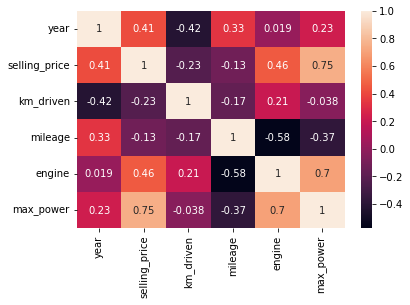

In [20]:
sns.heatmap(df.corr(), annot=True) #wyliczoną korelację nanoszę na wykres heatmap
#spora dodatnia korelacja między selling_price a max_power, czyli im większa moc silnika tym wyższa cena

In [21]:
df['age']=2022-df['year'] #tworzę nową zmienną age na podstawie zmiennej year czyli rok produkcji, 
#chcę dowiedzieć się jaki jest wiek pojazdów

In [22]:
df.drop('year', axis=1, inplace=True)

In [23]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,15


## Analiza zmiennych ilościowych

<AxesSubplot:>

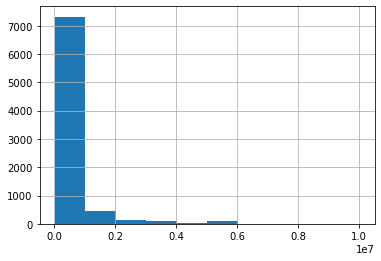

In [24]:
df['selling_price'].hist()

In [25]:
df['selling_price']= np.log(df['selling_price']) 
#wykonuję przekształcenia logarytmiczne na zmiennych charakteryzujących się silną asymetrią rozkładu

<AxesSubplot:>

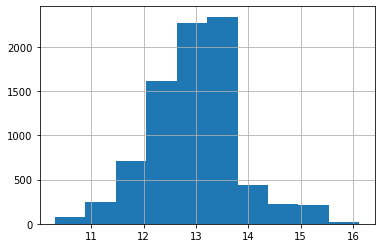

In [26]:
df['selling_price'].hist()

<AxesSubplot:>

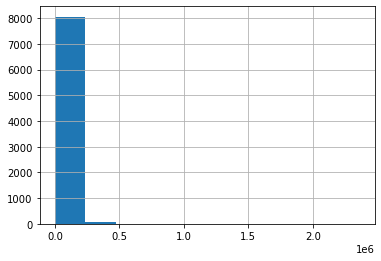

In [27]:
df['km_driven'].hist()

In [28]:
df['km_driven']= np.log(df['km_driven'])

<AxesSubplot:>

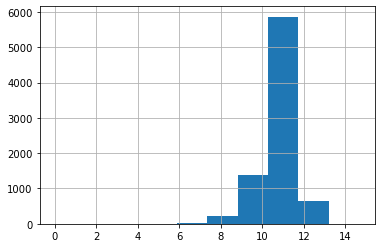

In [29]:
df['km_driven'].hist()

<AxesSubplot:>

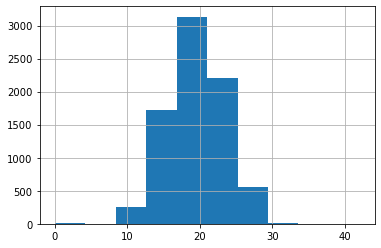

In [30]:
df['mileage'].hist() #tu nie ma asymetrii, więc pozostawiam tę zmienną bez przekształcenia

<AxesSubplot:>

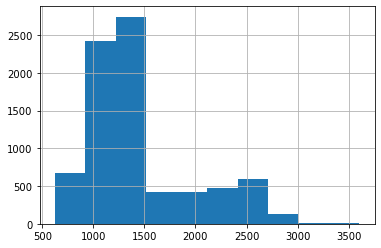

In [31]:
df['engine'].hist()

In [32]:
df['engine']= np.log(df['engine'])

<AxesSubplot:>

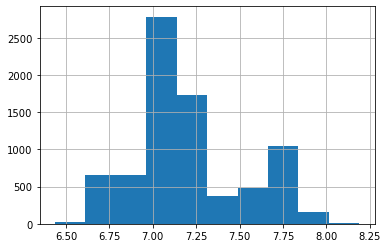

In [33]:
df['engine'].hist()

<AxesSubplot:>

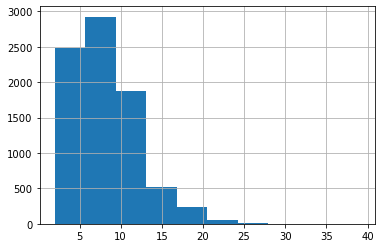

In [34]:
df['age'].hist()

In [35]:
df['age']= np.log(df['age'])

<AxesSubplot:>

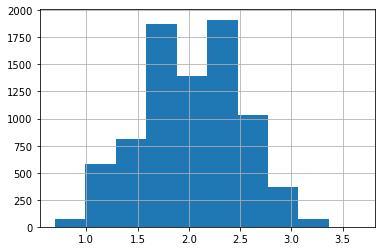

In [36]:
df['age'].hist()

## Podział zbioru

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Uzupełnienie braków danych w zbiorach

In [40]:
X_train.isnull().sum()

km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         151
engine          151
max_power       150
seats             0
age               0
dtype: int64

In [41]:
X_test.isnull().sum()

km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         70
engine          70
max_power       66
seats            0
age              0
dtype: int64

In [42]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,13.017003,11.887931,Diesel,Individual,Manual,First Owner,23.40,7.129298,74.00,5,2.079442
1,12.821258,11.695247,Diesel,Individual,Manual,Second Owner,21.14,7.311886,103.52,5,2.079442
2,11.970350,11.849398,Petrol,Individual,Manual,Third Owner,17.70,7.311218,78.00,5,2.772589
3,12.323856,11.751942,Diesel,Individual,Manual,First Owner,23.00,7.241366,90.00,5,2.484907
4,11.775290,11.695247,Petrol,Individual,Manual,First Owner,16.10,7.168580,88.20,5,2.708050


In [43]:
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [44]:
X_train['engine'].fillna(X_train['engine'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].mean(), inplace=True)

In [45]:
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [46]:
X_train.isnull().sum()

km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
age             0
dtype: int64

In [47]:
X_test.isnull().sum()

km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
age             0
dtype: int64

## One hot encoding

In [48]:
ohe_cols = ['fuel','seller_type','transmission','owner','seats']
for i in ohe_cols:
    dummy = pd.get_dummies(X_train[i], prefix = i)
    dummy_test = pd.get_dummies(X_test[i], prefix = i)
    
    mask = str(X_train[i].value_counts().index[0])
    
    dummy.drop(i + '_' + mask, inplace=True, axis=1)
    dummy_test.drop(i + '_' + mask, inplace=True, axis=1)
    
    X_train = pd.concat([X_train,dummy], axis=1)
    X_test = pd.concat([X_test,dummy_test], axis=1)
    
    X_train.drop(i, inplace=True, axis=1)
    X_test.drop(i, inplace=True, axis=1)
#zamieniam kolumny ze zmiennymi kategorycznymi na kilka kolumn z wartościamy 0-1, czyli przeprowadzam 'one-hot encoding'
#następnie usuwam kolumnę, gdzie występuje dominanta oryginalnej zmiennej kategorycznej
#łączę zbiory i usuwam oryginalną zmienną kategoryczną

In [49]:
X_train.head()

,km_driven,mileage,engine,max_power,age,fuel_CNG,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_4,seats_6,seats_7,seats_>=8
7480,11.695247,20.77,7.129298,88.80,2.197225,0,0,0,0,0,0,0,0,0,1,0,0,1,0
643,10.596635,18.90,6.905753,67.10,2.397895,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2052,10.085809,28.40,7.129298,74.02,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1016,11.740308,22.77,7.311886,98.59,2.197225,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1772,10.968198,23.40,7.129298,74.00,2.197225,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = linearModel.predict(X_test)

In [53]:
from sklearn import metrics

In [63]:
MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)) #przeciętnie prognozowana cena pojazdu różni się o 147970
MAE

147970.63838289553

In [64]:
MSE = metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)) 
#przeciętna kwadratowa różnica pomiędzy wartością pojazdu a prognozowaną wartością pojazdu to 88422612560
MSE

88422612559.81068

In [65]:
RMSE = np.sqrt(MSE) #prognozując modelem nasz błąd przeciętny to 297359 
RMSE

297359.39964933123

In [66]:
results = pd.DataFrame(data=[["Linear Regression", MAE, MSE, RMSE]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE'])
results.round()

,Model,MAE,MSE,RMSE
0,Linear Regression,147971.0,8.842261e+10,297359.0


In [56]:
print(linearModel.score(X_test, y_test)) #model w 85% wyjaśnia zmienność wartości pojazdu

0.857888220869453
